# Plotting the Covariance Ellipse

This notebook is duplicated from the repository linked to in this article 

[*An Alternative Way to Plot the Covariance Ellipse* by Carsten Schelp](https://carstenschelp.github.io/2018/09/14/Plot_Confidence_Ellipse_001.html), which has a GPL-3.0 License.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

In [2]:
def confidence_ellipse(x, y, ax, n_std=3, **kwargs):
    """
    Create a plot of the covariation confidence ellipse op `x` and `y`

    Parameters
    ----------
    x, y : array_like, shape (n, )
        Input data

    Returns
    -------
    float: the Pearson Correlation Coefficient for `x` and `y`.

    Other parameters
    ----------------
    kwargs : `~matplotlib.patches.Patch` properties

    author : Carsten Schelp
    license: GNU General Public License v3.0 (https://github.com/CarstenSchelp/CarstenSchelp.github.io/blob/master/LICENSE)
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")
    
    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1,1])
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0,0), width=ell_radius_x * 2, height=ell_radius_y * 2, **kwargs)

    # calculating the stdandarddeviation of x from  the squareroot of the variance
    # np.sqrt(cov[0, 0])
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)
    
    # calculating the stdandarddeviation of y from  the squareroot of the variance
    # np.sqrt(cov[1, 1])
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)
    
    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)
        
    ellipse.set_transform(transf + ax.transData)
    ax.add_patch(ellipse)
        
    return pearson        
    # render plot with "plt.show()".


## Create the plots for the blog-post

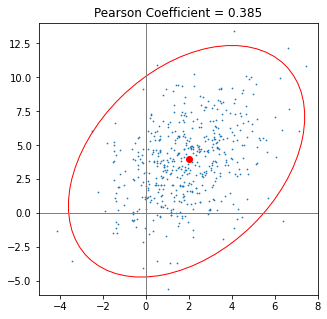

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
np.random.seed(567)
latent = np.random.randn(500, 2)
dependency = np.array([
    [0.9, 0.4],
    [0.1, -0.6]
])
mu = np.array([2, 4]).transpose()
scale = np.array([2, 4]).transpose()
dependent = latent.dot(dependency)
scaled = dependent * scale
scaled_with_offset = scaled + mu

data = np.array([[-3,2,5],[-4,-3,5]]).transpose()
pearson = confidence_ellipse(scaled_with_offset[:,0],scaled_with_offset[:,1], ax, facecolor='none', edgecolor='red')

ax.scatter(scaled_with_offset[:,0], scaled_with_offset[:,1], s=0.5)
ax.axvline(c='grey', lw=1)
ax.axhline(c='grey', lw=1)
ax.scatter([mu[0]], [mu[1]],c='red')

ax.set_xlim(-5,8)
ax.set_ylim(-6,14)
ax.set_title(f'Pearson Coefficient = {pearson:.3f}')
plt.savefig('./assets/001_vanilla_ellipse.png', bbox_inches='tight')
plt.show()

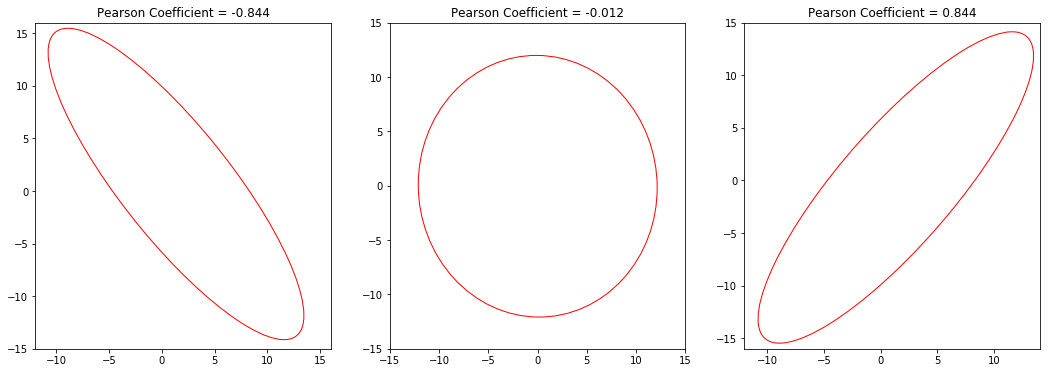

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
np.random.seed(456)

data_neg = np.array([[-3,2,5],[4,3,-5]]).transpose()
pearson_neg = confidence_ellipse(data_neg[:,0],data_neg[:,1], ax[0], facecolor='none', edgecolor='red')
ax[0].set_xlim(-12,16)
ax[0].set_ylim(-15,16)
ax[0].set_title(f'Pearson Coefficient = {pearson_neg:.3f}')

data_low = np.random.randn(20000, 2) * 4
pearson_low = confidence_ellipse(data_low[:,0],data_low[:,1], ax[1], facecolor='none', edgecolor='red')
ax[1].set_xlim(-15,15)
ax[1].set_ylim(-15,15)
ax[1].set_title(f'Pearson Coefficient = {pearson_low:.3f}')

data_pos = np.array([[-3,2,5],[-4,-3,5]]).transpose()
pearson_pos = confidence_ellipse(data_pos[:,0],data_pos[:,1], ax[2], facecolor='none', edgecolor='red')
ax[2].set_xlim(-12,14)
ax[2].set_ylim(-16,15)
ax[2].set_title(f'Pearson Coefficient = {pearson_pos:.3f}')
#plt.savefig('./img/001_neg_low_pos.png', bbox_inches='tight')
plt.show()

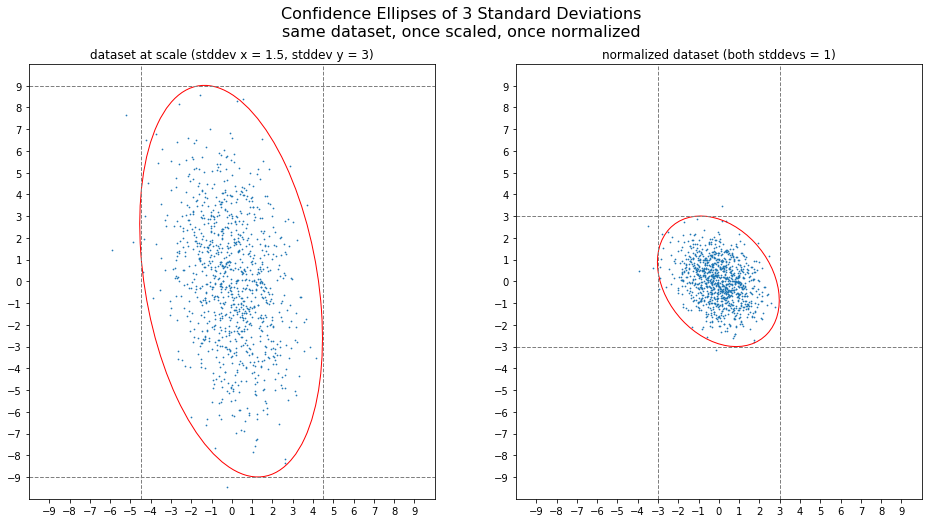

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
np.random.seed(123)
latent = np.random.randn(1000, 2)
dependency = np.array([
    [0.9, -0.3],
    [0.1, 0.7]
])

scale = np.array([1.5, 3]).transpose()

dependent = latent.dot(dependency)
normalized = dependent / np.std(dependent, axis=0)
scaled = normalized * scale

tickmarks = list(range(-9,10,1))
plt.suptitle('Confidence Ellipses of 3 Standard Deviations\nsame dataset, once scaled, once normalized', fontsize=16)

ax[0].scatter(scaled[:,0], scaled[:,1], s=0.5)
confidence_ellipse(scaled[:,0], scaled[:,1],ax[0], facecolor='none', edgecolor='red')
ax[0].set_title(f'dataset at scale (stddev x = 1.5, stddev y = 3)')
ax[0].set_xlim(-10,10)
ax[0].set_ylim(-10,10)
ax[0].xaxis.set_ticks(tickmarks)
ax[0].yaxis.set_ticks(tickmarks)

ax[0].axhline(y=-9, c='grey', lw=1, ls='dashed')
ax[0].axhline(y=9, c='grey', lw=1, ls='dashed')
ax[0].axvline(x=-4.5, c='grey', lw=1, ls='dashed')
ax[0].axvline(x=4.5, c='grey', lw=1, ls='dashed')

ax[1].scatter(normalized[:,0], normalized[:,1], s=0.5)
confidence_ellipse(normalized[:,0], normalized[:,1], ax[1], facecolor='none', edgecolor='red')
ax[1].set_title(f'normalized dataset (both stddevs = 1)')
ax[1].set_xlim(-10,10)
ax[1].set_ylim(-10,10)
ax[1].xaxis.set_ticks(tickmarks)
ax[1].yaxis.set_ticks(tickmarks)

ax[1].axhline(y=-3, c='grey', lw=1, ls='dashed')
ax[1].axhline(y=3, c='grey', lw=1, ls='dashed')
ax[1].axvline(x=-3, c='grey', lw=1, ls='dashed')
ax[1].axvline(x=3, c='grey', lw=1, ls='dashed')

#plt.savefig('./assets/001_scaled_norm.png', bbox_inches='tight')
plt.show()


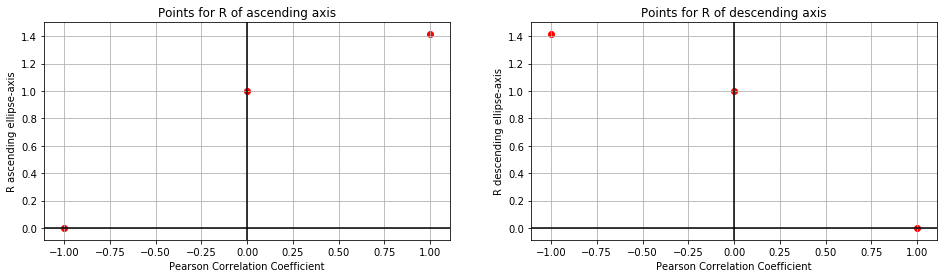

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
points_x = np.array([-1, 0, 1])
ax[0].scatter(points_x, [0, 1, np.sqrt(2)], c='red')
ax[1].scatter(-1 * points_x, [0, 1, np.sqrt(2)], c='red')

x = np.linspace(0, 2.5, num=200)
ax[0].axhline(y=0, color='black')
ax[0].axvline(x=0, color='black')
ax[0].grid(which='major')
ax[0].set_xlabel('Pearson Correlation Coefficient')
ax[0].set_ylabel('R ascending ellipse-axis')
ax[0].set_title('Points for R of ascending axis')

ax[1].axhline(color='black')
ax[1].axvline(color='black')
ax[1].grid(which='major')
ax[1].set_xlabel('Pearson Correlation Coefficient')
ax[1].set_ylabel('R descending ellipse-axis')
ax[1].set_title('Points for R of descending axis')

#plt.savefig('./img/001_guess_func.png', bbox_inches='tight')
plt.show()

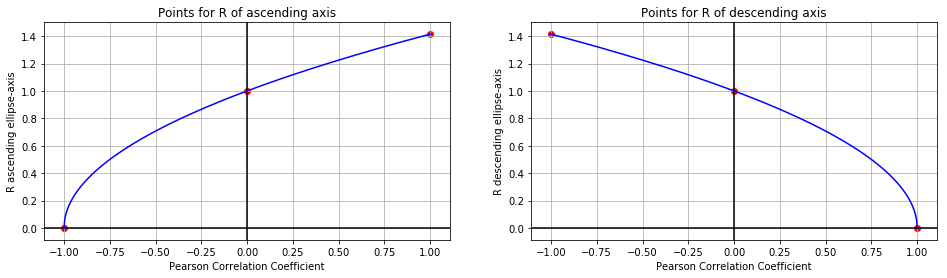

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
points_x = np.array([-1, 0, 1])
ax[0].scatter(points_x, [0, 1, np.sqrt(2)], c='red')
ax[1].scatter(points_x, [np.sqrt(2), 1, 0], c='red')

p = np.linspace(-1, 1, num=500)
r_asc = np.sqrt( 1 + p )
r_desc = np.sqrt( 1 - p )
ax[0].axhline(y=0, color='black')
ax[0].axvline(x=0, color='black')
ax[0].plot(p, r_asc, c='blue')
ax[0].grid(which='major')
ax[0].set_xlabel('Pearson Correlation Coefficient')
ax[0].set_ylabel('R ascending ellipse-axis')
ax[0].set_title('Points for R of ascending axis')

ax[1].plot(p, r_desc, c='blue')
ax[1].axhline(color='black')
ax[1].axvline(color='black')
ax[1].grid(which='major')
ax[1].set_xlabel('Pearson Correlation Coefficient')
ax[1].set_ylabel('R descending ellipse-axis')
ax[1].set_title('Points for R of descending axis')

#plt.savefig('./img/001_guess_func_2.png', bbox_inches='tight')
plt.show()